<a href="https://colab.research.google.com/github/AntoPrinzi99/NN-project-Antonino-Prinzivalli/blob/main/WORD_EMBEDDINGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing:

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gensim.downloader as api
import pickle
import urllib.request
import gzip
import shutil
import random
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
!gunzip cc.en.300.vec.gz

--2024-06-13 12:38:17--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.34, 3.162.163.11, 3.162.163.19, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1325960915 (1.2G) [binary/octet-stream]
Saving to: ‘cc.en.300.vec.gz’

cc.en.300.vec.gz    100%[===================>]   1.23G   350MB/s    in 3.8s    

2024-06-13 12:38:21 (333 MB/s) - ‘cc.en.300.vec.gz’ saved [1325960915/1325960915]



import the 2 model:

In [3]:
fasttext_model = KeyedVectors.load_word2vec_format('/content/cc.en.300.vec', binary=False)

In [4]:
word2vec_model = api.load('word2vec-google-news-300')

[--------------------------------------------------] 1.7% 27.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 6.1% 102.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.8% 130.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 11.0% 183.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.8% 212.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.5% 240.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 16.2% 269.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 18.0% 298.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.7% 328.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.5% 357.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 23.3% 386.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.0% 416.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 49.6% 824.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.3% 852.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 53.0% 881.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.7% 909.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.7% 943.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 84.0% 1397.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.7% 1425.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.7% 1457.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================================------] 89.4% 1486.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.0% 1546.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.7% 1574.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 96.4% 1603.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.1% 1631.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


just some test:

In [5]:
# Input word
parola_input = "dog"

# Find the most similar words
parole_simili = word2vec_model.most_similar(parola_input)


print(f"Parole più simili a '{parola_input}':")
for parola, similarita in parole_simili:
    print(f"- {parola}: {similarita:.4f}")

Parole più simili a 'dog':
- dogs: 0.8680
- puppy: 0.8106
- pit_bull: 0.7804
- pooch: 0.7627
- cat: 0.7609
- golden_retriever: 0.7501
- German_shepherd: 0.7465
- Rottweiler: 0.7438
- beagle: 0.7419
- pup: 0.7407


In [6]:
# Input word
parola_input = "dog"

# Find the most similar words
parole_simili = fasttext_model.most_similar(parola_input)


print(f"Parole più simili a '{parola_input}':")
for parola, similarita in parole_simili:
    print(f"- {parola}: {similarita:.4f}")

Parole più simili a 'dog':
- dogs: 0.8464
- puppy: 0.7873
- pup: 0.7692
- canine: 0.7435
- pet: 0.7334
- doggie: 0.7326
- dog--: 0.7242
- beagle: 0.7231
- dachshund: 0.7229
- cat: 0.7079


plotting:

Number of words in the filtered vocabulary: 602589
TARGET_WORDS=['school', 'dog', 'water', 'martial']
Number of valid words: 2922
Number of valid words: 2922
First 10 selected anchors : ['ASPCA', 'Aquafina', 'Aquifers', 'BUSD', 'Barktoberfest', 'Bernese', 'Boiling', 'Borzois', 'Brindi', 'Budokan']
absolute_embeddings_word2vec: torch.Size([2917, 300])
anchor_embeddings_word2vec: torch.Size([300, 300])
relative_embeddings2: torch.Size([2922, 300])


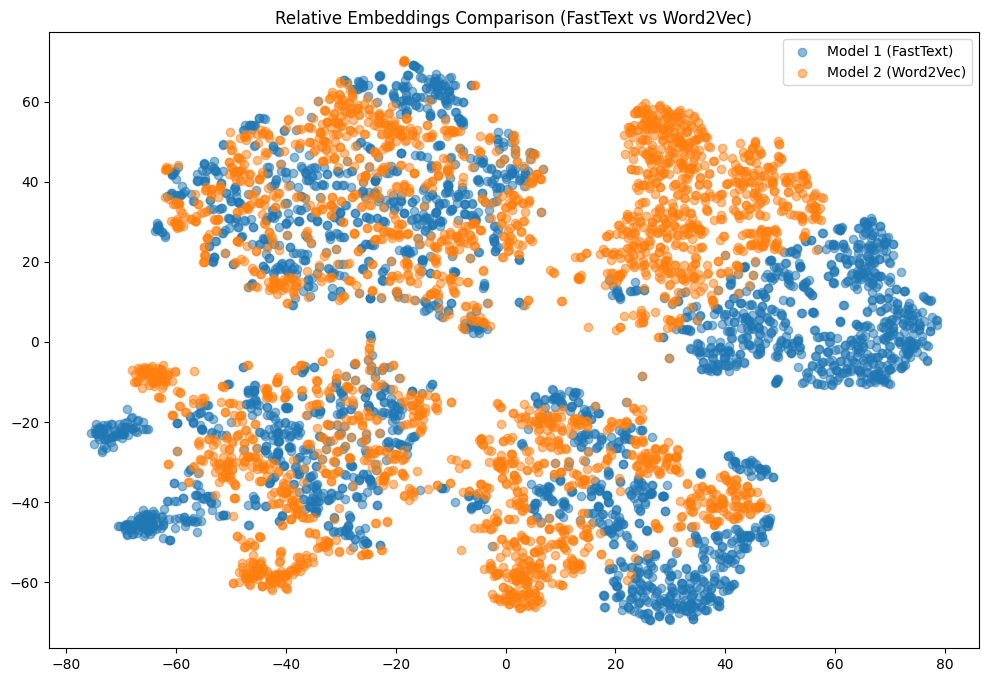

In [7]:


# Common vocabulary
vocabulary = list(set(fasttext_model.key_to_index).intersection(set(word2vec_model.key_to_index))) # take the words in common in the vocab
WORDS = [word for word in vocabulary if word.isalpha() and len(word) >= 4]  # do some filtering
print(f"Number of words in the filtered vocabulary: {len(WORDS)}")

# Create the targets
TARGET_WORDS = ["school", "dog", "water", "martial"] # we will create the cluster given the neighbours of these words
NUM_ANCHORS = 300
NUM_TARGETS = 2000

print(f"{TARGET_WORDS=}")

# Initialize a PyTorch tensor for targets
TARGETS = torch.zeros(len(WORDS), device="cpu")


target_cluster = [
    [word for word, sim in fasttext_model.most_similar(target_word, topn=NUM_TARGETS)]  #NUM_TARGETS are the neighbours
    for target_word in TARGET_WORDS # for each of the 4 target words find NUM_TARGETS neighb
]

# Create a word-index dictionary
word2index = {word: i for i, word in enumerate(WORDS)}

# Filters valid words and assigns to clusters
valid_words, valid_targets = [], []
for i, cluster in enumerate(target_cluster):
    valid_words.append(TARGET_WORDS[i])
    valid_targets.append(i + 1)
    for word in cluster:
        if word in word2index:
            valid_words.append(word)
            valid_targets.append(i + 1)

# Print the number of valid words found
print(f"Number of valid words: {len(valid_words)}")
print(f"Number of valid words: {len(valid_targets)}")


WORDS = valid_words # all the words, both the 4 targhet and their neighbours
TARGETS = valid_targets  # the index for each word

# Check that there are enough words to select anchors
if len(WORDS) < NUM_ANCHORS:
    raise ValueError(f"Number of valid words ({len(WORDS)}) is less than NUM_ANCHORS ({NUM_ANCHORS}).")

# Select 300 anchors from the vocabulary
ANCHOR_WORDS = sorted(random.sample(WORDS, NUM_ANCHORS))
print(f"First 10 selected anchors : {ANCHOR_WORDS[:10]}")

# Function to get relative embedding using PyTorch
def relative_projection(x, anchors):
    x = F.normalize(x, p=2, dim=-1)
    anchors = F.normalize(anchors, p=2, dim=-1)
    return torch.einsum("bm, am -> ba", x, anchors)

# Convert embeddings to PyTorch tensors
def get_embedding_tensor(words, model):
    embeddings = np.array([model[word] for word in words if word in model.key_to_index])
    return torch.tensor(embeddings, dtype=torch.float32)


# Function to obtain absolute cluster embeddings
def get_cluster_embeddings(clusters, model):
    all_words = []
    for word, neighbors in clusters.items():
        all_words.append(word)
        all_words.extend(neighbors)
    all_words = list(set(all_words))
    return get_embedding_tensor(all_words, model)


clusters_fasttext = {word: [neighbor for neighbor in target_cluster[i] if neighbor in word2index] for i, word in enumerate(TARGET_WORDS)}
clusters_word2vec = clusters_fasttext  # Usa gli stessi cluster per entrambi i modelli per confronto

# Get absolute cluster embeddings for the two models
absolute_embeddings_fasttext = get_cluster_embeddings(clusters_fasttext, fasttext_model)
absolute_embeddings_word2vec = get_cluster_embeddings(clusters_word2vec, word2vec_model)
print("absolute_embeddings_word2vec:",absolute_embeddings_word2vec.shape)

#Embedding of anchors for both models.
anchor_embeddings_fasttext = get_embedding_tensor(ANCHOR_WORDS, fasttext_model)
anchor_embeddings_word2vec = get_embedding_tensor(ANCHOR_WORDS, word2vec_model)
print("anchor_embeddings_word2vec:",anchor_embeddings_word2vec.shape)

# Function to view  embeddings with t-SNE
def plot_relative_embeddings_tsne(clusters, model1, model2, anchor_embeddings1, anchor_embeddings2, title):
    all_words = []
    for word, neighbors in clusters.items():
        all_words.append(word)
        all_words.extend(neighbors)


    all_words = [word for word in all_words if word in model1.key_to_index and word in model2.key_to_index]

    if not all_words:
        print(f"No words found for plotting in {title}")
        return

    word_embeddings1 = get_embedding_tensor(all_words, model1)
    word_embeddings2 = get_embedding_tensor(all_words, model2)
    relative_embeddings1 = relative_projection(word_embeddings1, anchor_embeddings1)
    relative_embeddings2 = relative_projection(word_embeddings2, anchor_embeddings2)
    print("relative_embeddings2:",relative_embeddings2.shape)

    tsne = TSNE(n_components=2, random_state=42)
    combined_embeddings = torch.cat([relative_embeddings1, relative_embeddings2], dim=0).detach().numpy()
    reduced_embeddings = tsne.fit_transform(combined_embeddings)

    fig, ax = plt.subplots(figsize=(12, 8))


    ax.scatter(reduced_embeddings[:relative_embeddings1.shape[0], 0],
               reduced_embeddings[:relative_embeddings1.shape[0], 1],
               label='Model 1 (FastText)', alpha=0.5)


    ax.scatter(reduced_embeddings[relative_embeddings1.shape[0]:, 0],
               reduced_embeddings[relative_embeddings1.shape[0]:, 1],
               label='Model 2 (Word2Vec)', alpha=0.5)

    ax.set_title(title)
    ax.legend()
    plt.show()

# View embedding related with t-SNE
plot_relative_embeddings_tsne(clusters_fasttext, fasttext_model, word2vec_model, anchor_embeddings_fasttext, anchor_embeddings_word2vec, 'Relative Embeddings Comparison (FastText vs Word2Vec)')

here i just change the way i visualize:

relative_embeddings torch.Size([2922, 300])
relative_embeddings torch.Size([2922, 300])


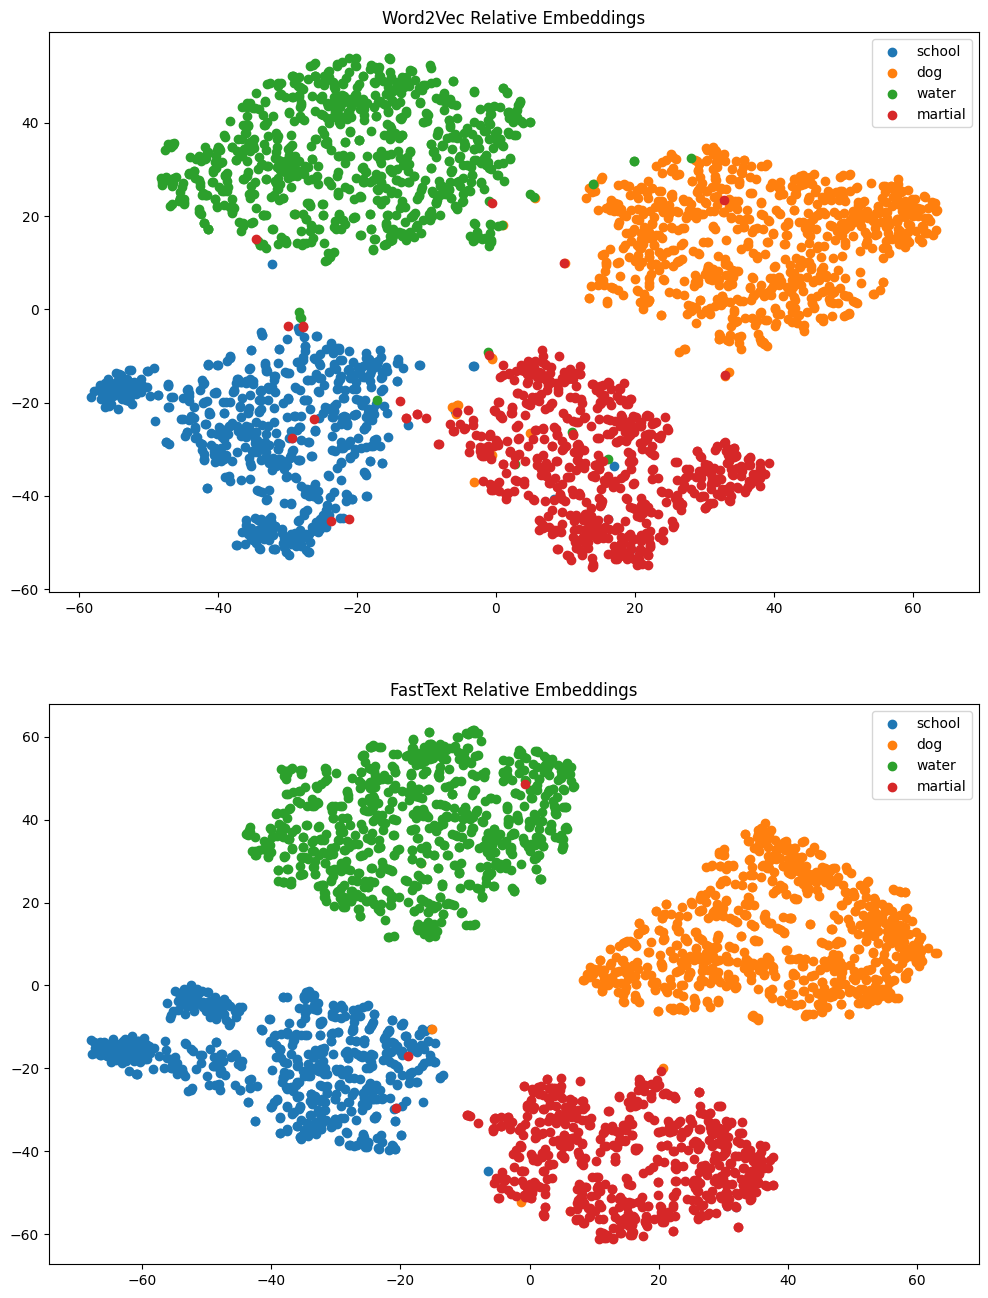

In [8]:

def plot_relative_embeddings(clusters, model, anchor_embeddings, title, ax):
    all_words = []
    for word, neighbors in clusters.items():
        all_words.append(word)
        all_words.extend(neighbors)


    all_words = [word for word in all_words if word in model.key_to_index]

    if not all_words:
        print(f"No words found for plotting in {title}")
        return

    word_embeddings = get_embedding_tensor(all_words, model)
    relative_embeddings = relative_projection(word_embeddings, anchor_embeddings)
    print("relative_embeddings", relative_embeddings.size())

    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(relative_embeddings.detach().numpy())

    start_idx = 0
    for word, neighbors in clusters.items():
        neighbors = [neighbor for neighbor in neighbors if neighbor in model.key_to_index]
        end_idx = start_idx + len(neighbors) + 1
        cluster_embeddings = reduced_embeddings[start_idx:end_idx]
        ax.scatter(cluster_embeddings[:, 0], cluster_embeddings[:, 1], label=word)
        start_idx = end_idx

    ax.set_title(title)
    ax.legend()


clusters_fasttext = {word: [neighbor for neighbor in target_cluster[i] if neighbor in word2index] for i, word in enumerate(TARGET_WORDS)}
clusters_word2vec = {word: [neighbor for neighbor in target_cluster[i] if neighbor in word2index] for i, word in enumerate(TARGET_WORDS)}


fig, axs = plt.subplots(2, 1, figsize=(12, 16))

plot_relative_embeddings(clusters_word2vec, word2vec_model, anchor_embeddings_word2vec, 'Word2Vec Relative Embeddings', axs[0])
plot_relative_embeddings(clusters_fasttext, fasttext_model, anchor_embeddings_fasttext, 'FastText Relative Embeddings', axs[1])

plt.show()


In [9]:

anchor_embeddings_fasttext = get_embedding_tensor(ANCHOR_WORDS, fasttext_model)
anchor_embeddings_word2vec = get_embedding_tensor(ANCHOR_WORDS, word2vec_model)


relative_embeddings_fasttext = relative_projection(absolute_embeddings_fasttext, anchor_embeddings_fasttext)
relative_embeddings_word2vec = relative_projection(absolute_embeddings_word2vec, anchor_embeddings_word2vec)


relative_embeddings_fasttext_np = relative_embeddings_fasttext.detach().numpy()
relative_embeddings_word2vec_np = relative_embeddings_word2vec.detach().numpy()

# Calculates the cosine similarity between the relative embeddings of the two models
cosine_sim = cosine_similarity(relative_embeddings_fasttext_np, relative_embeddings_word2vec_np)
# Print the average cosine similarity
mean_cosine_sim = np.mean(cosine_sim)
print(f"Mean Cosine Similarity: {mean_cosine_sim:.4f}")

Mean Cosine Similarity: 0.5226


In [10]:
absolute_embeddings_fasttext = get_cluster_embeddings(clusters_fasttext, fasttext_model)
absolute_embeddings_word2vec = get_cluster_embeddings(clusters_word2vec, word2vec_model)

# Calculates the cosine similarity between the relative embeddings of the two models
cosine_sim = cosine_similarity(absolute_embeddings_fasttext, absolute_embeddings_word2vec)
# Print the average cosine similarity
mean_cosine_sim = np.mean(cosine_sim)
print(f"Mean Cosine Similarity: {mean_cosine_sim:.4f}")

Mean Cosine Similarity: 0.0036
